# 1. Perceptron

In [1]:
def perceptron(w1, w2, theta):
    xs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    print('x1 x2 | y')
    print('----------')
    for x in xs:
        y = x[0]*w1 + x[1]*w2
        if y <= theta:
            print(f' {x[0]}  {x[1]} | 0')
        else:
            print(f' {x[0]}  {x[1]} | 1')

In [2]:
perceptron(-0.5, -0.5, -0.7)

x1 x2 | y
----------
 0  0 | 1
 0  1 | 1
 1  0 | 1
 1  1 | 0


<hr style="height:2px;color:gray;background-color:gray"/>

# 2. Multilayer Perceptron

In [1]:
def AND_gate(x1, x2):
    y = x1*(0.5) + x2*(0.5)
    if y <= 0.7:
        return 0
    else:
        return 1

def OR_gate(x1, x2):
    y = x1*(0.5) + x2*(0.5)
    if y <= 0.3:
        return 0
    else:
        return 1

def NAND_gate(x1, x2):
    y = x1*(-0.5) + x2*(-0.5)
    if y <= -0.7:
        return 0
    else:
        return 1

def NOR_gate(x1, x2):
    y = x1*(-0.5) + x2*(-0.5)
    if y <= -0.3:
        return 0
    else:
        return 1

In [2]:
def XOR_gate(x1, x2):
    s1 = NAND_gate(x1, x2)
    s2 = OR_gate(x1, x2)
    return AND_gate(s1, s2)

In [3]:
print('XOR true table:\n')
xs = [(0, 0), (0, 1), (1, 0), (1, 1)]
print('x1 x2 | y')
print('----------')
for x in xs:
    y = XOR_gate(x[0], x[1])
    print(f' {x[0]}  {x[1]} | {y}')

XOR true table:

x1 x2 | y
----------
 0  0 | 0
 0  1 | 1
 1  0 | 1
 1  1 | 0


<hr style="height:2px;color:gray;background-color:gray"/>

# 3. Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define MSE loss function
### $loss={1\over{2n}}\sum_{i=0}^n(y_i-\hat{y_i})^2={1\over{2n}}\sum_{i=0}^n(y-(w_0\times x+w_1))^2$

In [2]:
def MSE_loss(x, y, weight):
    dataNum = y.shape[0]
    predict = weight[0]*x + weight[1]
    loss = (np.sum((y - predict)**2)) / (2*dataNum)
    return loss

## Calcuate gradient
### ${\partial loss\over\partial w_0}=-{1\over n}\sum_{i=0}^n(y-w_0\times x+w_1)x$
### ${\partial loss\over\partial w_1}=-{1\over n}\sum_{i=0}^n(y-w_0\times x+w_1)$

In [3]:
def gradient(x, y, weight):
    dataNum = y.shape[0]
    predict = weight[0]*x + weight[1]
    g0 = -sum((y - predict)*x) / dataNum
    g1 = -sum(y - predict) / dataNum
    return np.array([[g0], [g1]])

## Create data

In [4]:
x = np.random.rand(100).astype(np.float32)
noise = np.random.normal(0, 0.1, x.shape).astype(np.float32)
y = 3 * x - 5  + noise

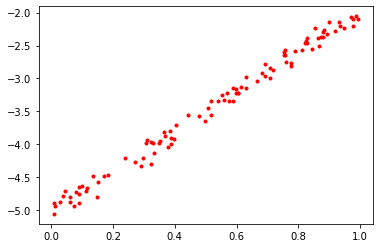

In [5]:
%matplotlib inline
plt.figure()
plt.plot(x, y, 'r.')
plt.show()

## Set hyperparameter

In [6]:
iterations = 150
lr = 0.5

## Training
- back propagation (gradient descent)

In [7]:
%matplotlib qt
hestory = []
w = np.zeros((2, 1))

plt.figure()
# backpropagation (gradient descent)
for iter in range(iterations):
    w = w - lr * gradient(x, y, w)
    mse = MSE_loss(x, y, w)
    hestory.append(mse)
    plt.cla()
    plt.plot(x, y, 'r.')
    plt.plot(x, w[0]*x + w[1])
    plt.title('iter:%d  loss=%.4f'%(iter+1, mse), fontdict={'size': 15})
    plt.pause(0.01)
    
print('w0=%f, w1=%f'%(w[0], w[1]))

w0=3.018408, w1=-5.008331


## Visualize loss

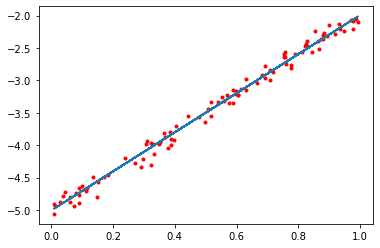

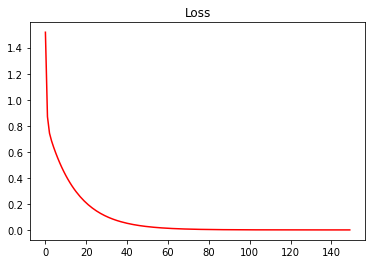

In [8]:
%matplotlib inline
plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, w[0]*x + w[1])

plt.figure()
plt.plot(range(iterations), hestory, 'r')
plt.title('Loss')
plt.show()

<hr style="height:2px;color:gray;background-color:gray"/>

# 4. Linear Regression with TF

## Import package

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers, losses
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.2.0


## Create data

In [2]:
x = np.random.rand(100).astype(np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.1, x.shape).astype(np.float32)
y = 3 * x - 5  + noise

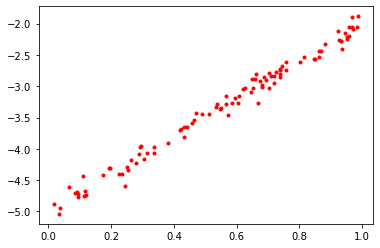

In [3]:
plt.figure()
plt.plot(x, y, 'r.')
plt.show()

## Create model

In [4]:
model = Sequential()
model.add(layers.Dense(1, input_dim=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Training

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.5), loss=losses.MSE)
history = model.fit(x, y, epochs=150)

Epoch 1/150
4/4 [==============================] - 0s 1ms/step - loss: 6.6252
Epoch 2/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8148
Epoch 3/150
4/4 [==============================] - 0s 997us/step - loss: 0.2696
Epoch 4/150
4/4 [==============================] - 0s 997us/step - loss: 0.1774
Epoch 5/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1474
Epoch 6/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0893
Epoch 7/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 8/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0424
Epoch 9/150
4/4 [==============================] - 0s 997us/step - loss: 0.0281
Epoch 10/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 11/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 12/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 13/150
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 104/150
4/4 [==============================] - 0s 997us/step - loss: 0.0126
Epoch 105/150
4/4 [==============================] - 0s 997us/step - loss: 0.0123
Epoch 106/150
4/4 [==============================] - 0s 997us/step - loss: 0.0114
Epoch 107/150
4/4 [==============================] - 0s 998us/step - loss: 0.0125
Epoch 108/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 109/150
4/4 [==============================] - 0s 997us/step - loss: 0.0105
Epoch 110/150
4/4 [==============================] - 0s 999us/step - loss: 0.0106
Epoch 111/150
4/4 [==============================] - 0s 998us/step - loss: 0.0130
Epoch 112/150
4/4 [==============================] - 0s 988us/step - loss: 0.0110
Epoch 113/150
4/4 [==============================] - 0s 997us/step - loss: 0.0113
Epoch 114/150
4/4 [==============================] - 0s 997us/step - loss: 0.0108
Epoch 115/150
4/4 [===============

## Get weights

In [6]:
weights = model.layers[0].get_weights()
w0 = weights[0]
w1 = weights[1]
print(f'w0=\n{w0}\n\nw1=\n{w1}')

w0=
[[2.9685714]]

w1=
[-5.0436206]


## Plot result

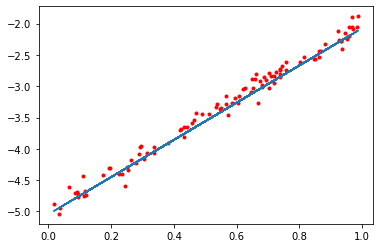

In [7]:
predict = model.predict(x)
plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, predict)
plt.show()

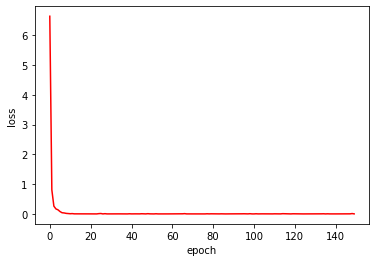

In [8]:
plt.figure()
plt.plot(history.history['loss'], 'r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

<hr style="height:2px;color:gray;background-color:gray"/>

# 5. Nonlinear Regression

## Import package

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers, losses
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.2.0


## Create data

In [2]:
x = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x.shape).astype(np.float32)
y = np.square(x) + noise

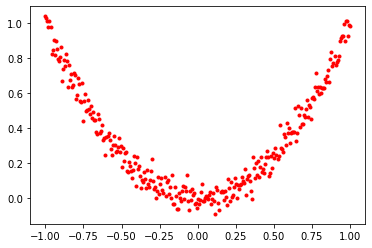

In [3]:
plt.figure()
plt.plot(x, y, 'r.')
plt.show()

## Create model

In [4]:
model = Sequential()
model.add(layers.Dense(10, input_dim=1, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Training

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.1), loss=losses.MSE)
history = model.fit(x, y, epochs=200)

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0701
Epoch 2/200
10/10 [==============================] - 0s 918us/step - loss: 0.0377
Epoch 3/200
10/10 [==============================] - 0s 898us/step - loss: 0.0296
Epoch 4/200
10/10 [==============================] - 0s 898us/step - loss: 0.0243
Epoch 5/200
10/10 [==============================] - 0s 795us/step - loss: 0.0204
Epoch 6/200
10/10 [==============================] - 0s 898us/step - loss: 0.0177
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 8/200
10/10 [==============================] - 0s 897us/step - loss: 0.0137
Epoch 9/200
10/10 [==============================] - 0s 947us/step - loss: 0.0125
Epoch 10/200
10/10 [==============================] - 0s 946us/step - loss: 0.0114
Epoch 11/200
10/10 [==============================] - 0s 798us/step - loss: 0.0105
Epoch 12/200
10/10 [==============================] - 0s 997us/step - loss: 0.0098
Epoch 13/200
10/1

10/10 [==============================] - 0s 1ms/step - loss: 0.0027


## Plot result

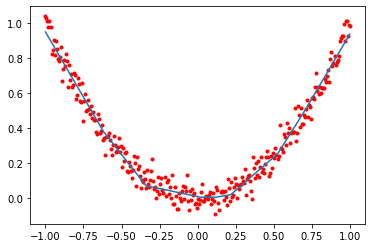

In [6]:
predict = model.predict(x)
plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, predict)
plt.show()

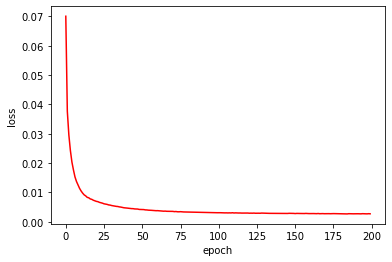

In [7]:
plt.figure()
plt.plot(history.history['loss'], 'r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

<hr style="height:2px;color:gray;background-color:gray"/>

# 6. Logic Regression

## Import package

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers, losses
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.2.0


## Create data

In [2]:
x = np.random.randn(100, 2).astype(np.float32)
y = np.where((x[:, 1] - x[:, 0])>0, 1, 0).reshape(100, 1)
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

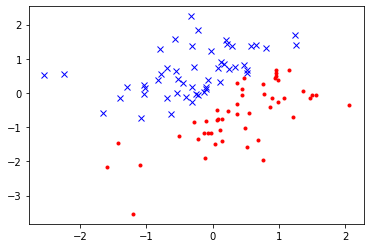

In [3]:
plt.plot(x[pos, 0], x[pos, 1], 'bx')
plt.plot(x[neg, 0], x[neg, 1], 'r.')
plt.show()

## Create model

In [4]:
model = Sequential()
model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Training

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.05), loss=losses.BinaryCrossentropy())
history = model.fit(x, y, epochs=600)

Epoch 1/600
4/4 [==============================] - 0s 1ms/step - loss: 0.6310
Epoch 2/600
4/4 [==============================] - 0s 997us/step - loss: 0.6129
Epoch 3/600
4/4 [==============================] - 0s 997us/step - loss: 0.5967
Epoch 4/600
4/4 [==============================] - 0s 997us/step - loss: 0.5791
Epoch 5/600
4/4 [==============================] - 0s 1ms/step - loss: 0.5628
Epoch 6/600
4/4 [==============================] - 0s 997us/step - loss: 0.5508
Epoch 7/600
4/4 [==============================] - 0s 1ms/step - loss: 0.5362
Epoch 8/600
4/4 [==============================] - 0s 997us/step - loss: 0.5232
Epoch 9/600
4/4 [==============================] - 0s 997us/step - loss: 0.5089
Epoch 10/600
4/4 [==============================] - 0s 997us/step - loss: 0.4984
Epoch 11/600
4/4 [==============================] - 0s 1ms/step - loss: 0.4874
Epoch 12/600
4/4 [==============================] - 0s 997us/step - loss: 0.4760
Epoch 13/600
4/4 [===========================

4/4 [==============================] - 0s 1ms/step - loss: 0.2168
Epoch 104/600
4/4 [==============================] - 0s 997us/step - loss: 0.2159
Epoch 105/600
4/4 [==============================] - 0s 997us/step - loss: 0.2151
Epoch 106/600
4/4 [==============================] - 0s 997us/step - loss: 0.2141
Epoch 107/600
4/4 [==============================] - 0s 997us/step - loss: 0.2133
Epoch 108/600
4/4 [==============================] - 0s 997us/step - loss: 0.2125
Epoch 109/600
4/4 [==============================] - 0s 1ms/step - loss: 0.2116
Epoch 110/600
4/4 [==============================] - 0s 997us/step - loss: 0.2108
Epoch 111/600
4/4 [==============================] - 0s 997us/step - loss: 0.2101
Epoch 112/600
4/4 [==============================] - 0s 1ms/step - loss: 0.2093
Epoch 113/600
4/4 [==============================] - 0s 1ms/step - loss: 0.2086
Epoch 114/600
4/4 [==============================] - 0s 997us/step - loss: 0.2077
Epoch 115/600
4/4 [===================

4/4 [==============================] - 0s 997us/step - loss: 0.1616
Epoch 205/600
4/4 [==============================] - 0s 997us/step - loss: 0.1612
Epoch 206/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1609
Epoch 207/600
4/4 [==============================] - 0s 997us/step - loss: 0.1606
Epoch 208/600
4/4 [==============================] - 0s 997us/step - loss: 0.1603
Epoch 209/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1600
Epoch 210/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1597
Epoch 211/600
4/4 [==============================] - 0s 997us/step - loss: 0.1594
Epoch 212/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1591
Epoch 213/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1588
Epoch 214/600
4/4 [==============================] - 0s 997us/step - loss: 0.1585
Epoch 215/600
4/4 [==============================] - 0s 997us/step - loss: 0.1582
Epoch 216/600
4/4 [=====================

4/4 [==============================] - 0s 1ms/step - loss: 0.1362
Epoch 306/600
4/4 [==============================] - 0s 997us/step - loss: 0.1360
Epoch 307/600
4/4 [==============================] - 0s 2ms/step - loss: 0.1358
Epoch 308/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1357
Epoch 309/600
4/4 [==============================] - 0s 2ms/step - loss: 0.1355
Epoch 310/600
4/4 [==============================] - 0s 997us/step - loss: 0.1353
Epoch 311/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1352
Epoch 312/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1349
Epoch 313/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1348
Epoch 314/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1346
Epoch 315/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1344
Epoch 316/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1343
Epoch 317/600
4/4 [==============================]

4/4 [==============================] - 0s 1ms/step - loss: 0.1208
Epoch 407/600
4/4 [==============================] - 0s 997us/step - loss: 0.1207
Epoch 408/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1206
Epoch 409/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1204
Epoch 410/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1203
Epoch 411/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1202
Epoch 412/600
4/4 [==============================] - 0s 2ms/step - loss: 0.1201
Epoch 413/600
4/4 [==============================] - 0s 2ms/step - loss: 0.1200
Epoch 414/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1199
Epoch 415/600
4/4 [==============================] - 0s 997us/step - loss: 0.1198
Epoch 416/600
4/4 [==============================] - 0s 997us/step - loss: 0.1197
Epoch 417/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1195
Epoch 418/600
4/4 [=============================

4/4 [==============================] - 0s 1ms/step - loss: 0.1102
Epoch 508/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1101
Epoch 509/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1100
Epoch 510/600
4/4 [==============================] - 0s 2ms/step - loss: 0.1099
Epoch 511/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1098
Epoch 512/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1098
Epoch 513/600
4/4 [==============================] - 0s 2ms/step - loss: 0.1097
Epoch 514/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1096
Epoch 515/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1095
Epoch 516/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1094
Epoch 517/600
4/4 [==============================] - 0s 1ms/step - loss: 0.1094
Epoch 518/600
4/4 [==============================] - 0s 2ms/step - loss: 0.1093
Epoch 519/600
4/4 [==============================] - 0

## Get weights

In [6]:
weights = model.layers[0].get_weights()
w0 = weights[0]
w1 = weights[1]
print(f'w0=\n{w0}\n\nw1=\n{w1}')

w0=
[[-4.0897427]
 [ 4.2485123]]

w1=
[0.37914515]


## Decision boundary
### $w_0x+w1=0 \Rightarrow w_{00}x_0+w_{01}x_1+w1=0$
### $x_1={-w_1-w_{00}*x_0\over w_{01}}$

In [7]:
xAxis = np.linspace(x[:,0].min(), x[:,0].max())
boundary = (-w1 - w0[0]*xAxis) / w0[1]

## Plot result

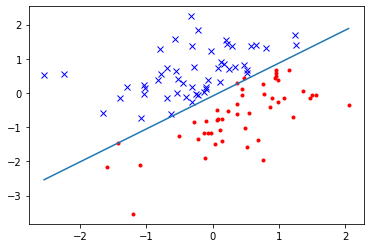

In [8]:
plt.plot(x[pos, 0], x[pos, 1], 'bx')
plt.plot(x[neg, 0], x[neg, 1], 'r.')
plt.plot(xAxis, boundary)
plt.show()

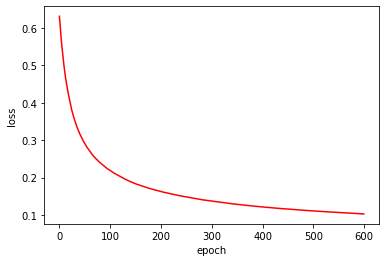

In [9]:
plt.figure()
plt.plot(history.history['loss'], 'r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()